<a href="https://colab.research.google.com/github/yesolYoon/covid19airtraffic/blob/main/covid19AirTraffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import Data

In [4]:
data = pd.read_csv('covid_impact_on_airport_traffic.csv')

In [5]:
data.head()

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
0,Daily,2020-04-03,1.0,Kingsford Smith,64,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
1,Daily,2020-04-13,1.0,Kingsford Smith,29,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
2,Daily,2020-07-10,1.0,Kingsford Smith,54,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
3,Daily,2020-09-02,1.0,Kingsford Smith,18,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."
4,Daily,2020-10-31,1.0,Kingsford Smith,22,POINT(151.180087713813 -33.9459774986125),Sydney,New South Wales,AU,Australia,"POLYGON((151.164354085922 -33.9301772341877, 1..."


In [6]:
data.describe(include = 'all')

,AggregationMethod,Date,Version,AirportName,PercentOfBaseline,Centroid,City,State,ISO_3166_2,Country,Geography
count,7247,7247,7247.0,7247,7247.000000,7247,7247,7247,7247,7247,7247
unique,1,262,NaN,28,NaN,28,27,23,23,4,28
top,Daily,2020-06-22,NaN,Hartsfield-Jackson Atlanta International,NaN,POINT(-84.4279188822754 33.6410758198944),New York,California,US-CA,United States of America (the),"POLYGON((-97.0429444313049 32.9265900261254, -..."
freq,7247,28,NaN,262,NaN,262,523,523,523,4441,262
mean,NaN,NaN,1.0,NaN,66.651442,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,22.134433,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1.0,NaN,53.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1.0,NaN,67.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1.0,NaN,84.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7247 entries, 0 to 7246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AggregationMethod  7247 non-null   object 
 1   Date               7247 non-null   object 
 2   Version            7247 non-null   float64
 3   AirportName        7247 non-null   object 
 4   PercentOfBaseline  7247 non-null   int64  
 5   Centroid           7247 non-null   object 
 6   City               7247 non-null   object 
 7   State              7247 non-null   object 
 8   ISO_3166_2         7247 non-null   object 
 9   Country            7247 non-null   object 
 10  Geography          7247 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 622.9+ KB


# Data Cleansing

In [101]:
data['Date']    = pd.to_datetime(data['Date'])
data['AirportName'] = data.Country.astype('category')
data['State'] = data.Country.astype('category')
data['Country'] = data['Country'].replace({'United States of America (the)':'USA'})
data['Country'] = data.Country.astype('category')

# Groupby

In [102]:
daily_agg = data.groupby(['Country', 'Date'], as_index = False)[['PercentOfBaseline']].mean()
daily_agg

,Country,Date,PercentOfBaseline
0,Australia,2020-03-16,92.000000
1,Australia,2020-03-17,90.000000
2,Australia,2020-03-18,97.000000
3,Australia,2020-03-19,89.000000
4,Australia,2020-03-20,85.000000
...,...,...,...
1043,USA,2020-11-28,58.235294
1044,USA,2020-11-29,64.000000
1045,USA,2020-11-30,69.294118
1046,USA,2020-12-01,75.000000


# Plot 1: avg. perc by country

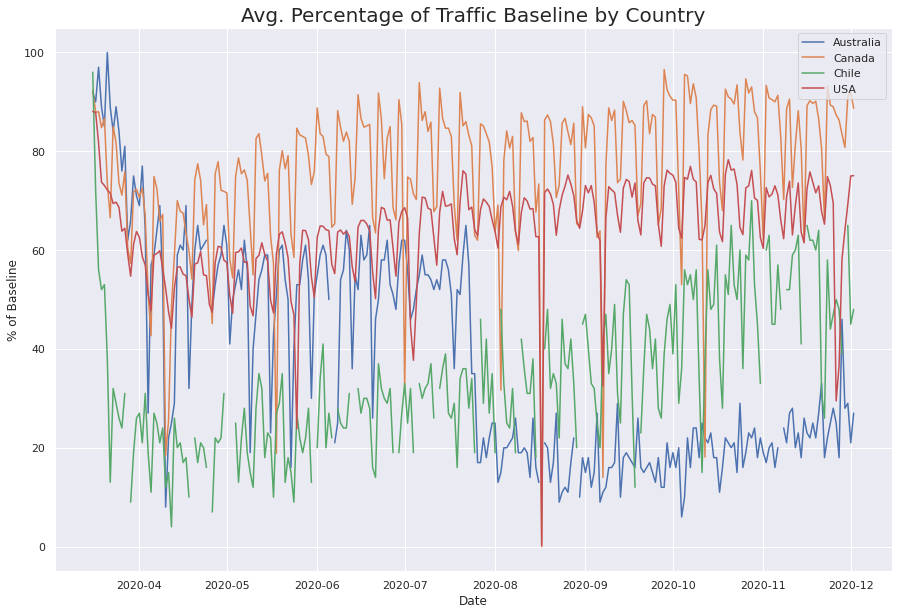

In [104]:
legends = list()
plt.figure(figsize=(15,10))
for a_country in data.Country.cat.categories:
  data_a_country = daily_agg[daily_agg['Country'] == a_country]
  plt.plot(data_a_country.Date, data_a_country.PercentOfBaseline)
  legends.append(a_country)
plt.legend(legends, loc = 'upper right')
plt.xlabel('Date')
plt.ylabel('% of Baseline')
plt.title('Avg. Percentage of Traffic Baseline by Country', fontdict={'size':20})
plt.show()